# Exercise 08

For the following function 

$\begin{eqnarray}
P(x)=x\exp(-x)  \hspace{2cm}  0\leq x < \infty
\end{eqnarray}$

(a) Find the mean and standard deviation. What is the probability content in the interval (mean-standard deviation, mean+standard deviation).

(b) Find the median and 68% central interval.

(c) Find the mode and 68% smallest interval.

In [113]:
from numpy import *
from matplotlib.pyplot import *

In [114]:
def P(x):
    return x*exp(-x)

In [281]:
xstart = 0.
xend   = 20.
xstepsize = 0.5
midpoints = arange(xstart,xend,xstepsize)+0.5*xstepsize
midpoints

array([  0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,   3.75,
         4.25,   4.75,   5.25,   5.75,   6.25,   6.75,   7.25,   7.75,
         8.25,   8.75,   9.25,   9.75,  10.25,  10.75,  11.25,  11.75,
        12.25,  12.75,  13.25,  13.75,  14.25,  14.75,  15.25,  15.75,
        16.25,  16.75,  17.25,  17.75,  18.25,  18.75,  19.25,  19.75])

In [282]:
xdata = arange(0.,100.,0.1)
# ydata = P(xdata)
ydata = P(midpoints)
# l = len(xdata)
# stepsize= xdata[2]-xdata[1]
stepsize = xstepsize
# print("Length of xdata array is: l=%d" % l)

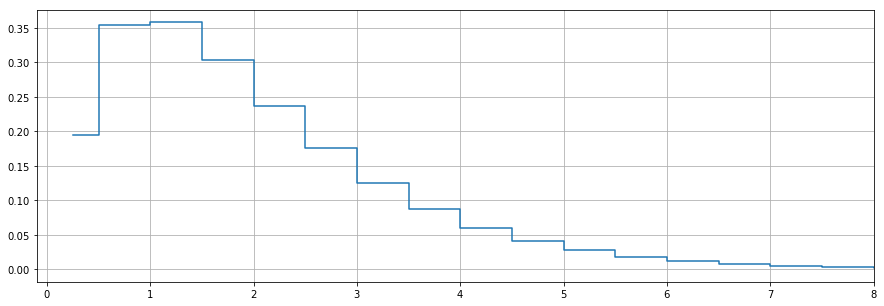

In [300]:
figure(figsize=(15, 5))
step(midpoints,ydata, where="mid")
grid('on')
xlim(-0.1,8)
show()

## (a) Find the mean and standard deviation. What is the probability content in the interval (mean-standard deviation, mean+standard deviation).

In [158]:
def calc_mean(xdata, ydata):
    mean = 0.
    area = 0.
    for i in range(0,len(xdata)):
        mean += xdata[i]*ydata[i]
        area += abs(ydata[i])
    return mean/area

def calc_std(xdata, ydata, mean):
    std = 0.
    area = 0.
    for i in range(0,len(xdata)):
        std += (xdata[i]-mean)**2*ydata[i]
        area += abs(ydata[i])
    return std/area

In [159]:
mean = calc_mean(xdata,ydata)
std = calc_std(xdata,ydata,mean)
mean, std

(2.0016663889550084, 1.9983341663360938)

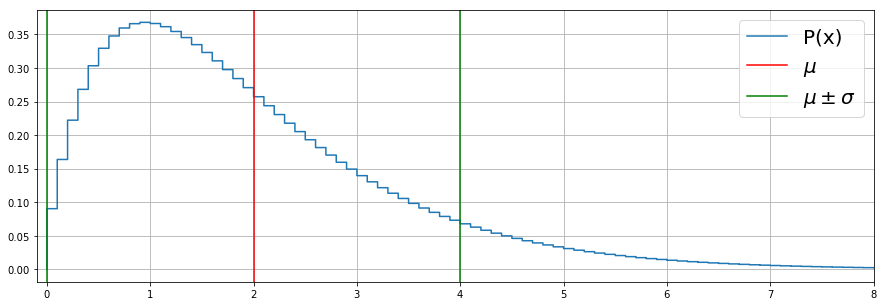

In [160]:
figure(figsize=(15, 5))
step(xdata,ydata, label="P(x)")
grid('on')
xlim(-0.1,8)

axvline(mean, color='red', label=r"$\mu$")
axvline(mean-std, color='green', label=r"$\mu\pm\sigma$")
axvline(mean+std, color='green')

legend(fontsize=20)
show()

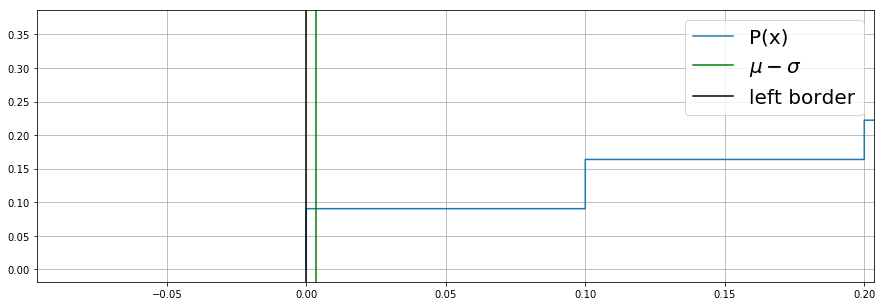

0.0

In [161]:
# First: Get left index of the interval:
idx_l = 1
stepsize = xdata[2]-xdata[1]
for i in range(0,len(xdata)):
    if (xdata[i]+stepsize) > (mean-std):
        idx_l = i
        break

figure(figsize=(15, 5))
step(xdata,ydata, label="P(x)")
grid('on')
xlim((mean-std)-1*stepsize,(mean-std)+2*stepsize)

axvline(mean-std, color='green', label=r"$\mu-\sigma$")
axvline(xdata[idx_l], color='black', label=r"left border")

legend(fontsize=20)
show()

ydata[idx_l]

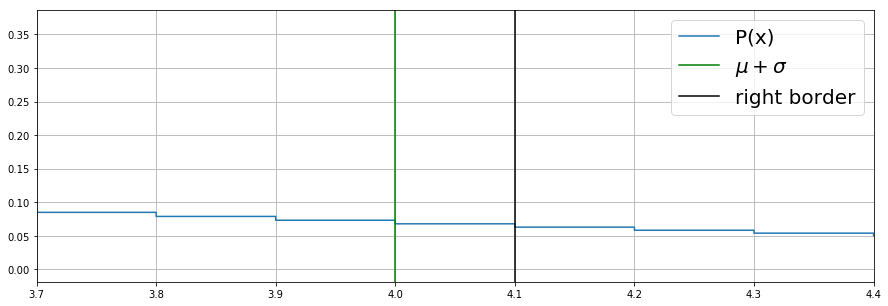

4.00000055529


In [162]:
# Second: Get right index of the interval:
idx_r = idx_l
stepsize = xdata[2]-xdata[1]
for i in range(1,len(xdata)):
    if (xdata[i]) > (mean+std):
        idx_r = i
        break
        
figure(figsize=(15, 5))
step(xdata,ydata, label="P(x)")
grid('on')
xlim((mean+std)-3*stepsize,(mean+std)+4*stepsize)

axvline(mean+std, color='green', label=r"$\mu+\sigma$")
axvline(xdata[idx_r], color='black', label=r"right border")

legend(fontsize=20)
show()

print(mean+std)

In [163]:
# Check:
print(idx_l, idx_r)
2*std < xdata[idx_r]-xdata[idx_l]

(0, 41)


True

In [165]:
# Sum up the bin entries of the bins of the interval
stepsize = xdata[2]-xdata[1]
p_std = 0.
for i in range(idx_l, idx_r):
    p_std += ydata[i]
p_std *= stepsize
p_std

0.9112062299493453

## (b) Find the median and 68% central interval.

In [179]:
def idx_median(xdata,ydata):
    idx_median = 0
    cumulative_sum = 0.
    stepsize= xdata[2]-xdata[1]
    for i in range(0,len(xdata)):
        cumulative_sum += ydata[i]*stepsize   
        if cumulative_sum >= 0.5:
            idx_median = i
            break    
    return idx_median

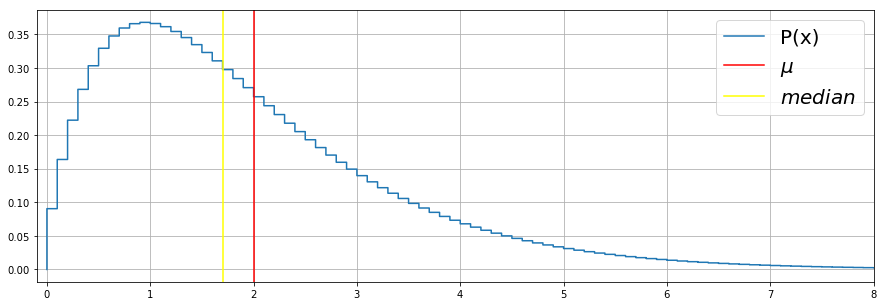

idx_median=17
P(idx_median)=0.310562


In [180]:
idx_median = idx_median(xdata,ydata)

figure(figsize=(15, 5))
step(xdata,ydata, label="P(x)")
grid('on')
xlim(-0.1,8)

axvline(mean, color='red', label=r"$\mu$")
axvline(xdata[idx_median], color='yellow', label=r"$median$")

legend(fontsize=20)
show()

print("idx_median=%d" % idx_median)
print("P(idx_median)=%f" % ydata[idx_median])

Now the central interval with $1-\alpha=68\%$

Find $r_1$:  $P(r < r_1) \leq \alpha/2 = 0.16$

Find $r_2$:  $P(r > r_2) \leq \alpha/2 = 0.16$

In [255]:
def get_r1(xdata,ydata):
    r1 = 0
    cumulative_sum = ydata[r1]*stepsize
    for i in range(1, len(xdata)):
        if cumulative_sum > 0.16:
            r1 = i-1
            break
        cumulative_sum += ydata[i]*stepsize
    return r1    

def get_r2(xdata,ydata):
    r2 = len(xdata)
    cumulative_sum = ydata[r2-1]*stepsize
    for i in range(len(xdata)-1,0,-1):
        if cumulative_sum > 0.16:
            r2 = i+1
            break
        cumulative_sum += ydata[i]*stepsize
    return r2



In [259]:
r1 = get_r1(xdata,ydata)
print("r_1 = %d" % r1)
#Check
checksum=0.
for i in range(0,r1):
    checksum+=ydata[i]*stepsize
print("checksum(r1) = %f" % checksum)
    
r2 = get_r2(xdata,ydata)
print("r_2 = %d" % r2)
checksum=0.
for i in range(r2+1,len(xdata)):
    checksum+=ydata[i]*stepsize
print("checksum(r2) = %f" % checksum)

r_1 = 7
checksum(r1) = 0.137716
r_2 = 33
checksum(r2) = 0.152583


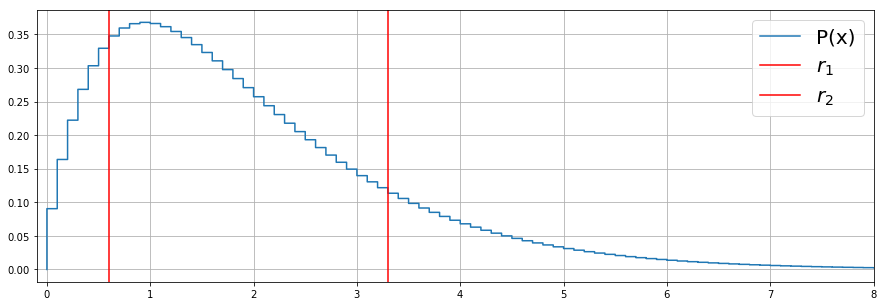

In [268]:
figure(figsize=(15, 5))
step(xdata,ydata, label="P(x)")
grid('on')
xlim(-0.1,8)

axvline(xdata[r1-1], color='red', label=r"$r_1$")
axvline(xdata[r2], color='red', label=r"$r_2$")
legend(fontsize=20)
show()

## (c) Find the mode and 68% smallest interval.

In [198]:
def idx_mode(xdata,ydata):
    idx_mode = 0
    maximum = ydata[0]
    for i in range(1,len(xdata)):  
        if ydata[i] > maximum:
            idx_mode = i
            maximum = ydata[i]
    return idx_mode

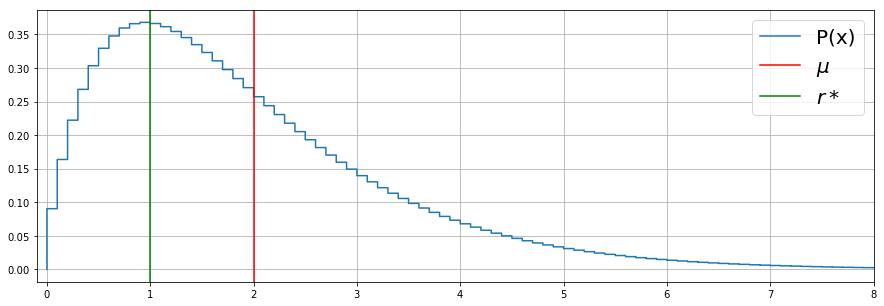

idx_mode=10
P(idx_mode)=0.367879


In [196]:
idx_mode = idx_mode(xdata,ydata)

figure(figsize=(15, 5))
step(xdata,ydata, label="P(x)")
grid('on')
xlim(-0.1,8)

axvline(mean, color='red', label=r"$\mu$")
axvline(xdata[idx_mode], color='green', label=r"$r*$")

legend(fontsize=20)
show()

print("idx_mode=%d" % idx_mode)
print("P(idx_mode)=%f" % ydata[idx_mode])